In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.optimize as optimize
from scipy.stats import genpareto, norm, uniform
from skgof import ks_test, cvm_test, ad_test
import matplotlib.pyplot as plt

In [2]:
data = np.array([1.7, 2.2, 14.4, 1.1, 0.4, 20.6, 5.3, 0.7, 1.9,
13, 12, 9.3, 1.4, 18.7, 8.5, 25.5, 11.6, 14.1, 22.1, 1.1, 2.5, 14.4,
1.7, 37.6, 0.6, 2.2, 39, 0.3, 15, 11, 7.3, 22.9, 1.7, 0.1, 1.1, 0.6,
9, 1.7, 7, 20.1, 0.4, 2.8, 14.1, 9.9, 10.4, 10.7, 30, 3.6, 5.6,
30.8, 13.3, 4.2, 25.5, 3.4, 11.9, 21.5, 27.6, 36.4, 2.7, 64, 1.5,
2.5, 27.4, 1, 27.1, 20.2, 16.8, 5.3, 9.7, 27.5, 2.5, 27])

In [3]:
def opt_function_gpd(theta0, data):
    N = len(data)
    s1 = np.sum(np.log(1-theta0*data))
    s2 = N*np.log(-1/(N*theta0) * s1)
#     print('s2', s2)
    return N + s1 + s2

def get_k_alpha(theta, data):
    N = len(data)
    s = np.sum(np.log(1-theta*data))
    k = -1/N * s
    alpha = k/theta
    return k, alpha

In [4]:
res = optimize.minimize(opt_function_gpd, -0.00007, args=(data), method='Nelder-Mead', tol=1e-8, options={'disp':True})
res.x

Optimization terminated successfully.
         Current function value: 252.127954
         Iterations: 11
         Function evaluations: 23


array([-7.64257812e-05])

In [5]:
genpareto.fit(data, floc=0)

C:\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2282: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1059: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(0.00093171044399552, 0, 12.192762604144477)

In [6]:
get_k_alpha(res.x[0], data)

(-0.0009318439724662177, 12.19279616413758)

In [7]:
def get_A2(data, k, alpha):
    N = len(data)
    s = 0
    for i in range(1, N+1):
        s = s + (2*i-1)*(np.log(genpareto.cdf(data[i-1], k, 0, alpha)) + np.log(1-genpareto.cdf(data[N-i], k, 0, alpha)))
    s = -1/N*s - N
    return s

def get_W2(data, k, alpha):
    N = len(data)
    s = 1/(12*N)
    for i in range(1, N+1):
        s = s + (genpareto.cdf(data[i-1], k, 0, alpha) - (2*i-1)/(2*N))**2
    
    return s

In [8]:
get_W2(sorted(data), -0.006, 12.14), get_A2(sorted(data), -0.006, 12.14)

(0.23322760298404213, 1.467144830583237)

In [20]:
w2, a2 = get_W2(sorted(data), 0.00093171044399552, 12.192762604144477), get_A2(sorted(data), 0.00093171044399552, 12.192762604144477)
w2, a2

(0.2303640036495989, 1.4560321678490453)

In [10]:
def F_func(x, k, alpha):
    return 1 - (1-k*x/alpha)**(1/k)

In [11]:
def get_Z(data, k, alpha):
    res = []
    for x in data:
#         res.append(genpareto.cdf(x, k, 0, alpha))
        res.append(F_func(x, k, alpha))
    return np.array(res)

In [12]:
Z = get_Z(sorted(data), 0.00093171044399552, 12.192762604144477)
# Z = get_Z(sorted(data), 0.006, 12.14)
Z

array([0.00816808, 0.02430481, 0.03227454, 0.03227454, 0.04801942,
       0.04801942, 0.05579563, 0.07874555, 0.086271  , 0.086271  ,
       0.086271  , 0.10848085, 0.11576362, 0.13015134, 0.13015134,
       0.13015134, 0.13015134, 0.14430516, 0.16510564, 0.16510564,
       0.18540095, 0.18540095, 0.18540095, 0.19865658, 0.20520336,
       0.24337701, 0.25569006, 0.29144099, 0.35258783, 0.35258783,
       0.36832936, 0.43688121, 0.45057494, 0.50210266, 0.52212054,
       0.5337432 , 0.54880195, 0.55614812, 0.57399497, 0.58435708,
       0.59446736, 0.61395679, 0.62334772, 0.62642703, 0.65587015,
       0.66424237, 0.68558678, 0.68558678, 0.69323667, 0.69323667,
       0.7079831 , 0.74810722, 0.78449983, 0.80790904, 0.80948045,
       0.81563873, 0.82877748, 0.83701268, 0.84738068, 0.87673822,
       0.87673822, 0.89103363, 0.89192551, 0.89455762, 0.89542068,
       0.89627669, 0.91484657, 0.92026655, 0.94968929, 0.95441768,
       0.95937593, 0.99481452])

In [106]:
cvm_test(Z, uniform(0, 1))

GofResult(statistic=0.23101743473906552, pvalue=0.21478804492050874)

In [107]:
ad_test(Z, uniform(0.0, 1.0))

GofResult(statistic=1.4595058932866891, pvalue=0.18647052176387946)

In [98]:
stats.kstest(Z, stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.14205791265082257, pvalue=0.09905351528254956)

In [54]:
len(data)

72

In [68]:
 ks_test((0.1, 0.9, 0.1, 0.1), uniform(0, 1))

GofResult(statistic=0.65, pvalue=0.03521250000000009)

In [16]:
genpareto.sf(0.999, 0.5)

61.24555320336755

In [46]:
doc = pd.read_csv('W2.csv')
doc

,p/a,0.5,0.25,0.1,0.05,0.025,0.01,0.005,0.001
0,-0.9,0.046,0.067,0.094,0.115,0.136,0.165,0.187,0.239
1,-0.5,0.049,0.072,0.101,0.124,0.147,0.179,0.204,0.264
2,-0.2,0.053,0.078,0.111,0.137,0.164,0.200,0.228,0.294
3,-0.1,0.055,0.081,0.116,0.144,0.172,0.210,0.240,0.310
4,0.0,0.057,0.086,0.124,0.153,0.183,0.224,0.255,0.330
5,0.1,0.059,0.089,0.129,0.160,0.192,0.236,0.270,0.351
6,0.2,0.062,0.094,0.137,0.171,0.206,0.254,0.291,0.380
7,0.3,0.065,0.100,0.147,0.184,0.223,0.276,0.317,0.415
8,0.4,0.069,0.107,0.159,0.201,0.244,0.303,0.349,0.458
9,0.5,0.074,0.116,0.174,0.222,0.271,0.338,0.390,0.513


In [47]:
d1 = doc.loc[0].tolist()[1:]
Y = [0.5,0.25,0.1,0.05,0.025,0.01,0.005,0.001]
d1

[0.046, 0.067, 0.094, 0.115, 0.136, 0.165, 0.187, 0.239]

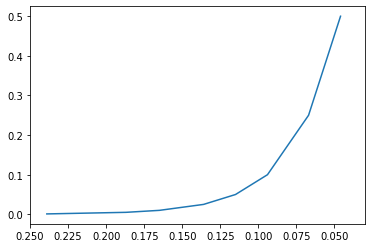

In [62]:
plt.xlim(0.25,0.03)
plt.plot(d1,Y)

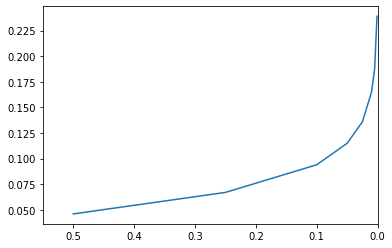

In [61]:
plt.xlim(0.55,0)
plt.plot(Y,d1)

In [51]:
Y2 = doc['p/a'].tolist()
Y2

[-0.9, -0.5, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

In [52]:
D2 = doc['0.5'].tolist()
D2

[0.046,
 0.049,
 0.053,
 0.055,
 0.057,
 0.059000000000000004,
 0.062,
 0.065,
 0.069,
 0.07400000000000001]

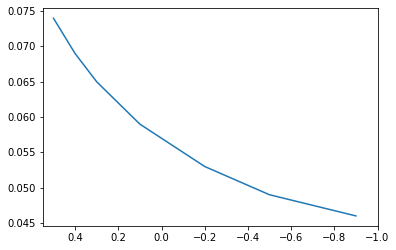

In [64]:
plt.xlim(0.55,-1)
plt.plot(Y2,D2)

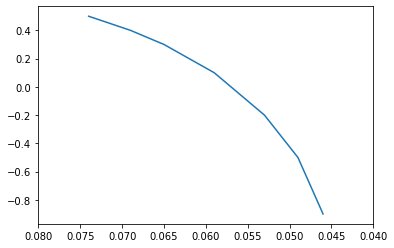

In [66]:
plt.xlim(0.08,0.04)
plt.plot(D2,Y2)